In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

df = pd.read_csv('/Users/silvialee/Downloads/final_table.csv')
df

In [ ]:
df.prod_section.unique()

array(['Deli', 'Home', 'Grocery', 'Dairy', 'Natural Foods', 'Front End',
       'HBA', 'Produce', 'Bakery Instore', 'Frozen', 'Bakery Commercial',
       'HMR', 'Bulk', 'Salad Bar', 'Coupons/Empties', 'Meat', 'OTC',
       'Entertainment', 'Floral', 'Seafood', 'Liquor', 'Baby', 'Garden',
       'Eyewear', 'Mass Cosmetics', 'Tobacco',
       'Community Room / Cooking School', 'Telecom', 'Pharmacy',
       'Customer Service', 'Prestige Cosmetics', 'Other'], dtype=object)

In [ ]:
df.prod_category.unique()

array(['Gourmet Foods', 'Kitchen Prep', 'Breakfast',
       'Hot Beverages & Accessories', 'Cold Beverages', 'Canned',
       'Meal Makers', 'Condiments', 'Household Paper Products',
       'Yogurt/Refrigerated Juice', 'Natural Foods',
       'Soft Goods (Textiles)', 'Hardware/Automotive',
       'Front End Service', 'Skincare', 'Snacks', 'Fruit', 'Vegetables',
       'In-Store', 'Cheese/Butter/Margarine', 'Savory', 'Baking',
       'Household', 'Deli Cheese', 'Commercial', 'HMR', 'Bulk Foods',
       'Salad Bar', 'Confectionary', 'Sweet', 'Deli Meat', 'Grooming',
       'Empties and Additionals', 'Frozen Boxed Meat', 'Wellness',
       'Outdoor Living', 'Sports', 'Floral', 'Milk & Eggs',
       'Fresh Seafood', 'Reading', 'Processed',
       'Household Cleaning Needs', 'Fresh Beef', 'Frozen Seafood', 'Beer',
       'Coupons', 'Baby', 'Salad Fixings', 'Oralcare', 'Garden',
       'Fresh-Pork', 'Medicinal Products', 'Home Decor', 'Hard Goods',
       'Dollar Shop', 'Fresh-Poultry', 'Fre

In [ ]:
df.prod_subcategory.unique()

array(['Gourmet Foods', 'Kitchen Gadgets', 'Cereal Rte', 'Coffee',
       'Water', 'Canned Fish/Meat', 'Canned Vegetables', 'Side Dish/Rice',
       'Beans/Dried Vegetabl', 'Sauces/Marinades', 'Condiments',
       'Towels - Paper & Reu', 'Yogurt', 'Dairy-Natural Foods',
       'Confectionary / Bars', 'Spreads', 'Top Of Bed', 'Lighting',
       'Front End Services', 'Suncare', 'Nutritional Portable',
       'Berries/Cherries', 'Cooking Veg', 'Rolls-In-Store', 'Root Veg',
       'Vegetables-Value Add', 'Tomatoes', 'Salad Veg', 'Bathroom Tissue',
       'Cheese', 'Pizza', 'Baking-Spices', 'Front End Bags', 'Citrus',
       'Tropical', 'Breads-In-Store', 'Deli Cheese', 'Sweets-Commercial',
       'Ready to Eat', 'Confectionary', 'Bananas', 'Cut Fruit',
       'Alternatives-Commerc', 'Carbonated Soft Drin', 'Chocolate',
       'Grapes', 'Pasta', 'Ice Cream', 'Service Deli Meat',
       'Juices & Drinks', 'Soap', 'Rolls-Commercial',
       'Empties and Addition', 'Baked Protein', 'Baking / B

### Question 1

In [ ]:
# Convert cust_id to string
df['cust_id'] = df['cust_id'].astype(str)

# Check the length of each cust_id, if there's a pattern in the length
df['cust_id_length'] = df['cust_id'].apply(len)

# Look at the distribution of the lengths
length_distribution = df['cust_id_length'].value_counts()

# If there is a specific pattern like a set of fixed digits, you can look for that
# For example, if you suspect that the first 3 digits are an identifier
df['cust_id_prefix'] = df['cust_id'].apply(lambda x: x[:3])

# Check the unique prefixes and their counts
prefix_distribution = df['cust_id_prefix'].value_counts()

# Further analysis can be done based on the results of these initial explorations
# For example, correlating cust_id with purchase amounts to see if certain patterns correspond to higher spending

print(length_distribution)
print(prefix_distribution)

# Other statistical analyses or visualizations here

cust_id_length
10    37257598
14     4790055
11     3070819
Name: count, dtype: int64
cust_id_prefix
112    15183129
113     8516965
600     4498285
114     4004910
332     3070819
111     1702753
101     1229680
107     1000803
105      936767
115      893144
100      857116
104      696106
103      588811
106      423438
109      345710
110      320537
102      308328
108      249401
246      167310
245      113324
500       11136
Name: count, dtype: int64


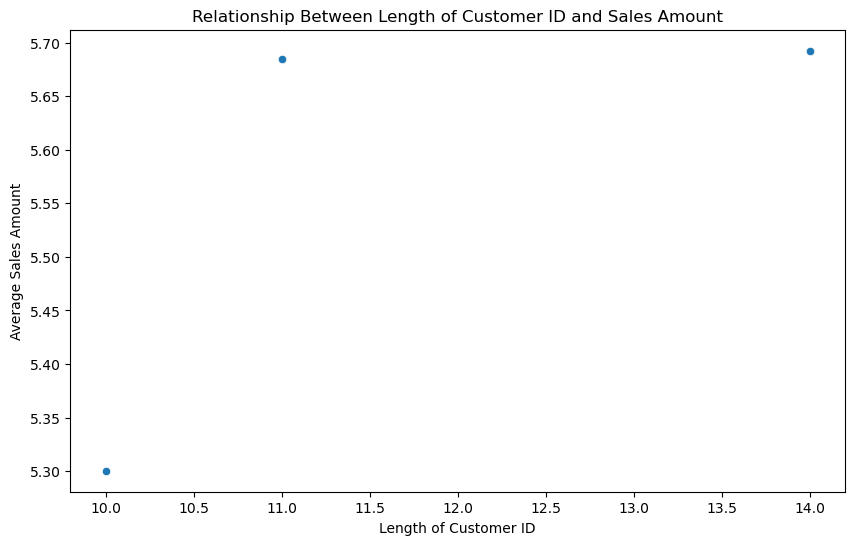

In [ ]:
import seaborn as sns
# correlation between length of customer_id and sales_amt -- longer id means more loyalty?

# Calculate customer_id length
df['cust_id_length'] = df['cust_id'].astype(str).apply(len)

# Aggregate sales amount by customer_id length. Used mean for simple calculation
sales_by_cust_id_length = df.groupby('cust_id_length')['sales_amt'].mean().reset_index()

# Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_by_cust_id_length, x='cust_id_length', y='sales_amt')
plt.title('Relationship Between Length of Customer ID and Sales Amount')
plt.xlabel('Length of Customer ID')
plt.ylabel('Average Sales Amount')
plt.show()

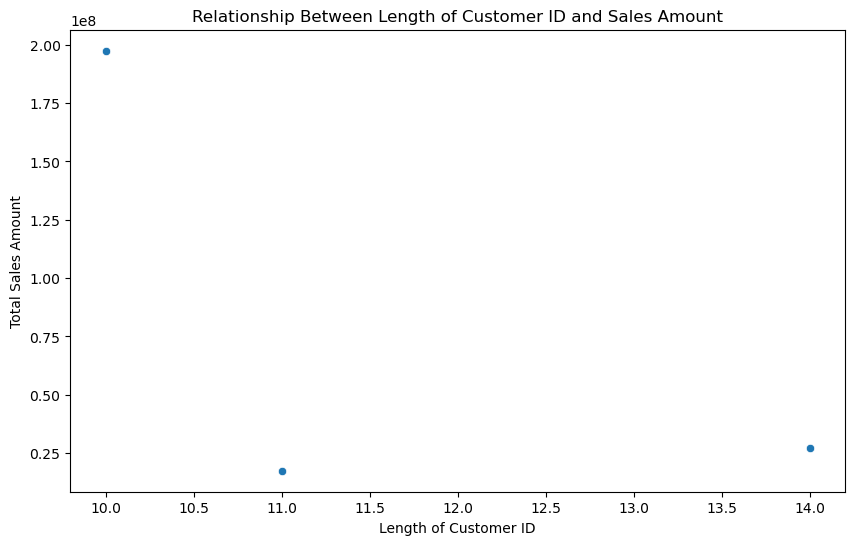

In [ ]:
# hmmm what is this buffonery? 
# let's disregard average

# Calculate customer_id length
df['cust_id_length'] = df['cust_id'].astype(str).apply(len)

# Aggregate sales amount by customer_id length. let's do sum
sales_by_cust_id_length = df.groupby('cust_id_length')['sales_amt'].sum().reset_index()

# Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_by_cust_id_length, x='cust_id_length', y='sales_amt')
plt.title('Relationship Between Length of Customer ID and Sales Amount')
plt.xlabel('Length of Customer ID')
plt.ylabel('Total Sales Amount')
plt.show()

In [ ]:
# Since most cust_id has 10-14 digits but we can eyeball that the first 3 are mostly similar -- let's divide first 3 and last 3
df['cust_id_prefix'] = df['cust_id'].str[:3]  
prefixes = df['cust_id_prefix'].value_counts()


df['cust_id_suffix'] = df['cust_id'].str[-3:]  
suffixes = df['cust_id_suffix'].value_counts()

print(prefixes)
print(suffixes)


cust_id_prefix
112    15183129
113     8516965
600     4498285
114     4004910
332     3070819
111     1702753
101     1229680
107     1000803
105      936767
115      893144
100      857116
104      696106
103      588811
106      423438
109      345710
110      320537
102      308328
108      249401
246      167310
245      113324
500       11136
Name: count, dtype: int64
cust_id_suffix
840    111887
260    105743
210    104965
610    104839
730    103015
        ...  
725     23765
079     23498
212     23488
456     20687
857     20396
Name: count, Length: 1000, dtype: int64


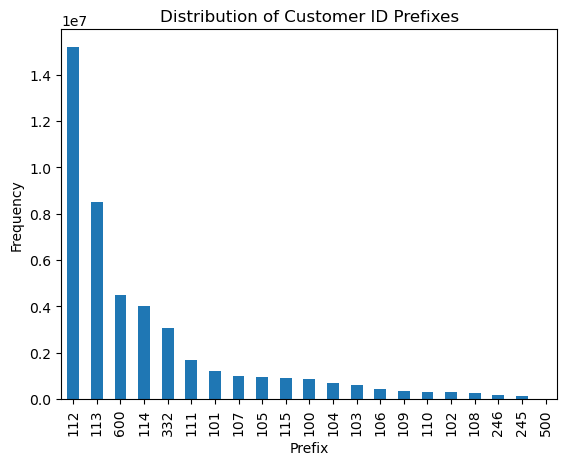

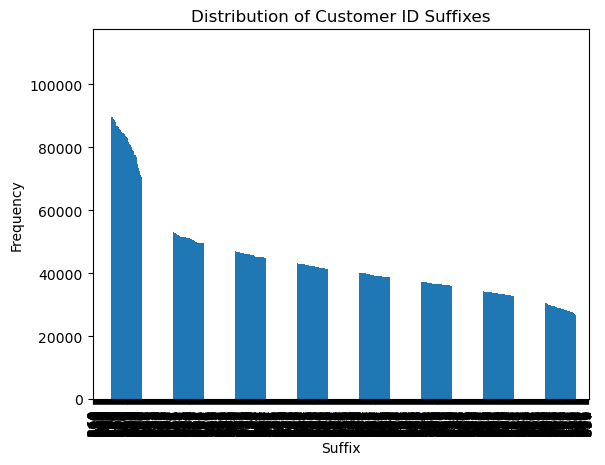

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of prefixes
prefixes.plot(kind='bar')
plt.title('Distribution of Customer ID Prefixes')
plt.xlabel('Prefix')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of suffixes
suffixes.plot(kind='bar')
plt.title('Distribution of Customer ID Suffixes')
plt.xlabel('Suffix')
plt.ylabel('Frequency')
plt.show()


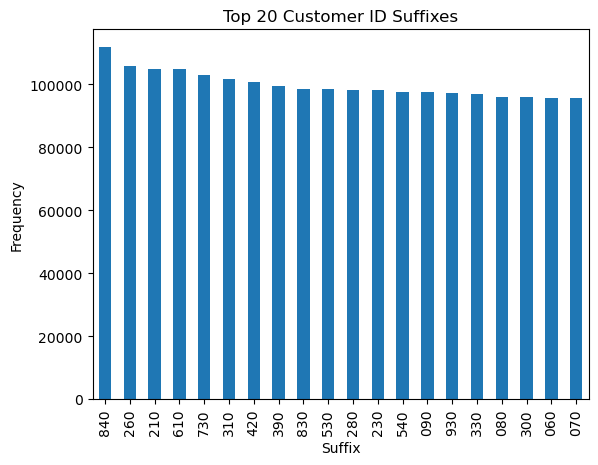

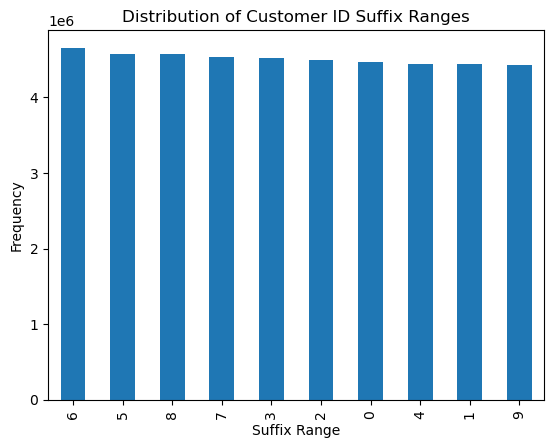

In [ ]:
# ok, it seems like there's a pattern in prefix but not suffix -- let's just do top 20

# Plot the distribution of the top 20 most common suffixes
top_suffixes = suffixes.head(20)
top_suffixes.plot(kind='bar')
plt.title('Top 20 Customer ID Suffixes')
plt.xlabel('Suffix')
plt.ylabel('Frequency')
plt.show()

# If you decide to group the suffixes
suffix_range_counts = df['cust_id_suffix'].apply(lambda x: x[:1]).value_counts()  # Group by the first digit of the suffix
suffix_range_counts.plot(kind='bar')
plt.title('Distribution of Customer ID Suffix Ranges')
plt.xlabel('Suffix Range')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, f_oneway, pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Let's say you want to perform a chi-square test for the association between store_id and cust_id_prefix -- maybe certain stores have differently coded loyal customers
cross_tab = pd.crosstab(df['store_id'], df['cust_id_prefix'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square test result: Chi2 = {chi2}, p-value = {p}")

# For ANOVA, comparing sales_qty across different cust_id_prefix
df['sales_qty'] = df['sales_qty'].astype(float)

# Group data by cust_id_prefix
grouped_data = df.groupby('cust_id_prefix')['sales_qty'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*grouped_data)
print(f"ANOVA test result: F = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# For correlation, we'll need a numeric representation of cust_id
# You can choose a segment, like the suffix or prefix, and convert it to numeric
df['cust_id_suffix_numeric'] = LabelEncoder().fit_transform(df['cust_id_suffix'])

# Calculate Spearman correlation -- 
spearman_corr, p_value_spearman = spearmanr(df['cust_id_suffix_numeric'], df['sales_amt'])
print(f"Spearman correlation: r = {spearman_corr}, p-value = {p_value_spearman}")


Chi-square test result: Chi2 = 1793418.4746711906, p-value = 0.0
ANOVA test result: F = 82.40298276424394, p-value = 0.0
Spearman correlation: r = -0.0008746612328660701, p-value = 4.2252338584362164e-09


In [ ]:
# Assuming `loyal_customers` is a list of customer IDs that represent your loyal customers
loyal_customers = df[df['cust_id'].str[:3].isin(['112', '113', '600'])]

# Filter transactions made by loyal customers
loyal_customers_transactions = df[df['cust_id'].isin(loyal_customers)]


# Calculate the top 10 products for these loyal customers
top_10_products_desc_loyal = loyal_customers['prod_desc'].value_counts().head(10).reset_index()
top_10_products_desc_loyal.columns = ['Product', 'Frequency']

top_10_products_section_loyal = loyal_customers['prod_section'].value_counts().head(10).reset_index()
top_10_products_section_loyal.columns = ['Product', 'Frequency']

top_10_products_category_loyal = loyal_customers['prod_category'].value_counts().head(10).reset_index()
top_10_products_category_loyal.columns = ['Product', 'Frequency']

top_10_products_subcategory_loyal = loyal_customers['prod_subcategory'].value_counts().head(10).reset_index()
top_10_products_subcategory_loyal.columns = ['Product', 'Frequency']



# Calculate the top 10 stores for these loyal customers
top_10_stores_loyal = loyal_customers['store_id'].value_counts().head(10).reset_index()
top_10_stores_loyal.columns = ['Store ID', 'Frequency']

# Output the results
print("Top 10 Products among Loyal Customers:")
print(top_10_products_desc_loyal)
print(top_10_products_section_loyal)
print(top_10_products_category_loyal)
print(top_10_products_subcategory_loyal)

print("\nTop 10 Stores among Loyal Customers:")
print(top_10_stores_loyal)


Top 10 Products among Loyal Customers:
                             Product  Frequency
0                  ACSE PLASTIC BAGS     973213
1                             BANANA     446408
2               ACSE GREEN PC POINTS     154364
3      PENNY ROUNDING - DO NOT TOUCH     141243
4                   CUCUMBER ENGLISH     137316
5                   ACSE PLUS POINTS     130552
6  ACSE GRADE A EGGS LARGE WHITE, EA     114397
7                  PEPPERS RED SWEET     102749
8                           BROCCOLI     100337
9                COLL DISC PROG DISC      97833
             Product  Frequency
0            Grocery    7306756
1            Produce    6220170
2              Dairy    2475034
3               Meat    1425472
4      Natural Foods    1394560
5               Home    1314203
6               Deli    1268596
7             Frozen    1087916
8     Bakery Instore    1014678
9  Bakery Commercial     868325
          Product  Frequency
0      Vegetables    3618993
1           Fruit    24

## Question 2

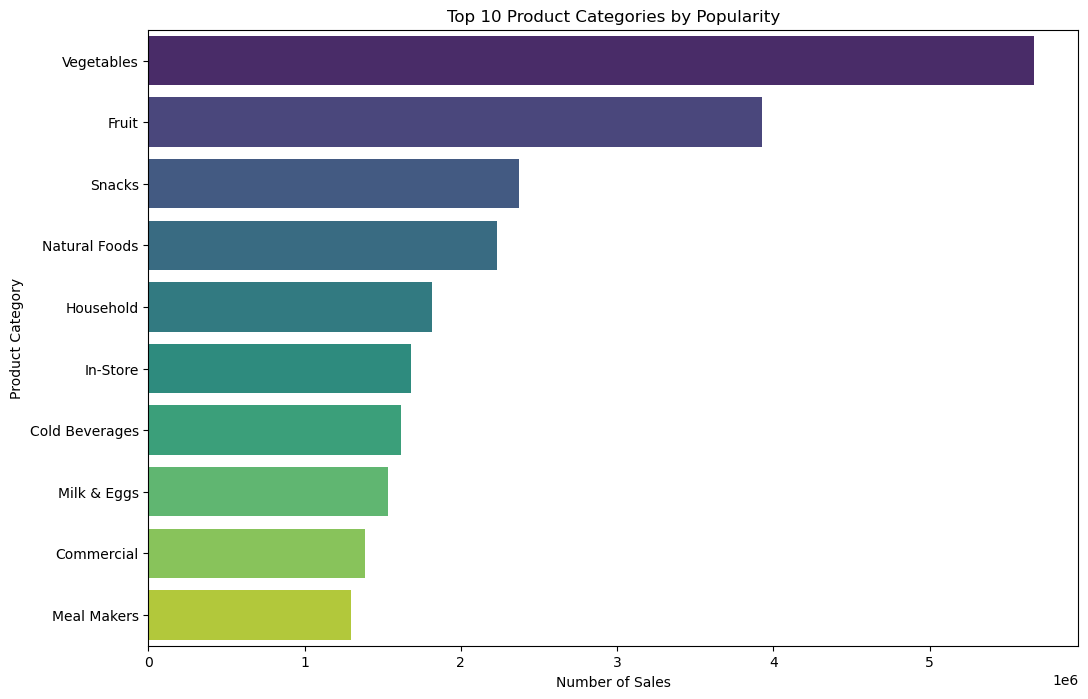

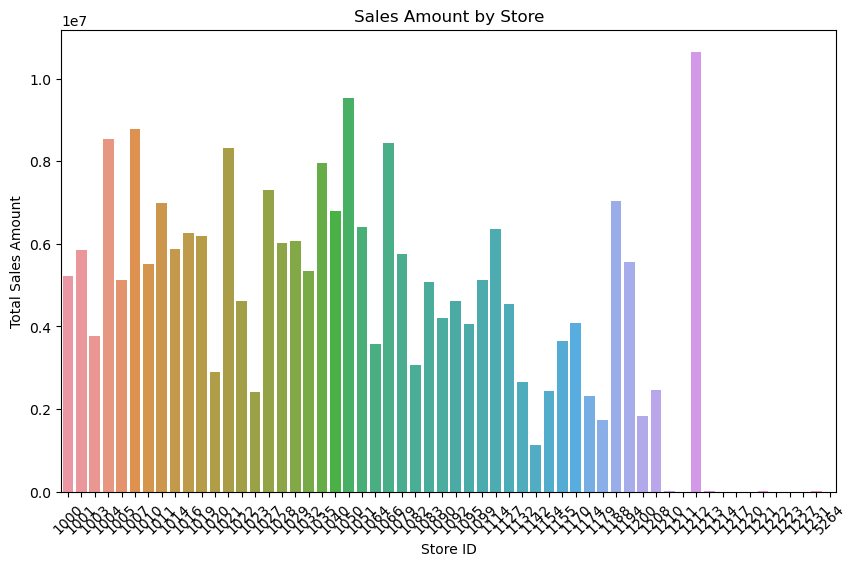

In [ ]:
# Visualization 2: Top 10 Product Categories Popularity
# Calculate the top 10 product categories by count
top_categories = df['prod_category'].value_counts().head(10)

# Create a bar plot for the top 10 product categories
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Popularity')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category')
plt.show()

# # Visualization 7: Sales Amount by Store
store_sales = df.groupby('store_id')['sales_amt'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Sales Amount by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
vegetables_buyers = df[df['prod_category'] == 'Vegetables']['cust_id'].value_counts()
regular_vegetable_buyers = vegetables_buyers[vegetables_buyers > 1].index
percent_regular_vegetable_buyers = (len(regular_vegetable_buyers) / len(df['cust_id'].unique())) * 100


print(f"Percentage of customers who regularly buy vegetables: {percent_regular_vegetable_buyers:.2f}%")


fruit_product_buyers = df[df['prod_category'] == 'Fruit']['cust_id'].value_counts()
regular_fruit_buyers = fruit_product_buyers[fruit_product_buyers > 1].index
percent_regular_fruit_buyers = (len(regular_fruit_buyers) / len(df['cust_id'].unique())) * 100


print(f"Percentage of customers who regularly buy fruits: {percent_regular_fruit_buyers:.2f}%")

sncaks_buyers = df[df['prod_category'] == 'Snacks']['cust_id'].value_counts()
regular_snacks_buyers = sncaks_buyers[sncaks_buyers > 1].index
percent_regular_snacks_buyers = (len(regular_snacks_buyers) / len(df['cust_id'].unique())) * 100


print(f"Percentage of customers who regularly buy snacks: {percent_regular_snacks_buyers:.2f}%")

Percentage of customers who regularly buy vegetables: 40.13%
Percentage of customers who regularly buy fruits: 36.75%
Percentage of customers who regularly buy snacks: 32.77%


In [ ]:
# 1. What % of customers always buy products at a discount (e.g. at 50% of the price - adjust threshold. There is also a ‘coupon’ category in the products table.)
# Calculate the discount percentage
df['discount_percentage'] = ((df['prod_uom_value'] - df['sales_amt']) / df['prod_uom_value']) * 100

# Determine the transactions with a significant discount (e.g., at least 50% off)
df['significant_discount'] = df['discount_percentage'] >= 50

# Identify customers who only buy at significant discounts
discount_buyers = df.groupby('cust_id')['significant_discount'].all()

# Calculate the percentage of such customers
percent_discount_buyers = discount_buyers.mean() * 100

# Print the result
print(f"Percentage of customers who always buy at a significant discount: {percent_discount_buyers:.2f}%")


Percentage of customers who always buy at a significant discount: 16.40%


In [ ]:
# 2. Customers who regularly buy baby products
baby_product_buyers = df[df['prod_category'] == 'Baby']['cust_id'].value_counts()
regular_baby_buyers = baby_product_buyers[baby_product_buyers > 1].index
percent_regular_baby_buyers = (len(regular_baby_buyers) / len(df['cust_id'].unique())) * 100


print(f"Percentage of customers who regularly buy baby products: {percent_regular_baby_buyers:.2f}%")


Percentage of customers who regularly buy baby products: 4.74%


In [ ]:
# 3. Customers who regularly buy cat/dog food
pet_food_buyers = df[df['prod_category'] == 'Pet Food & Supplies']['cust_id'].value_counts()
regular_pet_food_buyers = pet_food_buyers[pet_food_buyers > 1].index
percent_regular_pet_food_buyers = (len(regular_pet_food_buyers) / len(df['cust_id'].unique())) * 100

print(f"Percentage of customers who regularly buy cat/dog food: {percent_regular_pet_food_buyers:.2f}%")

Percentage of customers who regularly buy cat/dog food: 4.69%


### Question 3

In [ ]:
# RECENCY
# and that it's in the format 'YYYY-MM-DD'
df['trans_dt'] = pd.to_datetime(df['trans_dt'])

# Define the current day for the analysis
current_day = pd.to_datetime('2020-01-31')

# Calculate recency for each transaction
df['Recency'] = (current_day - df['trans_dt']).dt.days

# Determine the unique customers for each time frame
unique_customers = df['cust_id'].nunique()

# Calculate the number and percentage of customers who have visited in each time frame
visits_1_week = df[df['Recency'] <= 7]['cust_id'].nunique() / unique_customers * 100
visits_2_weeks = df[df['Recency'] <= 14]['cust_id'].nunique() / unique_customers * 100
visits_3_weeks = df[df['Recency'] <= 21]['cust_id'].nunique() / unique_customers * 100
visits_1_month = df[df['Recency'] <= 30]['cust_id'].nunique() / unique_customers * 100

# Print the results
print(f"Percentage of customers visited within the last 1 week: {visits_1_week:.2f}%")
print(f"Percentage of customers visited within the last 2 weeks: {visits_2_weeks:.2f}%")
print(f"Percentage of customers visited within the last 3 weeks: {visits_3_weeks:.2f}%")
print(f"Percentage of customers visited within the last 1 month: {visits_1_month:.2f}%")

Percentage of customers visited within the last 1 week: 7.12%
Percentage of customers visited within the last 2 weeks: 10.24%
Percentage of customers visited within the last 3 weeks: 12.49%
Percentage of customers visited within the last 1 month: 14.71%


In [ ]:
# FREQUENCY (multiple customers can visit/day so use trans_id)
frequency_df = df.groupby('cust_id')['trans_id'].nunique().reset_index(name='Frequency')

# Calculate the average visit frequency
average_frequency = frequency_df['Frequency'].mean()

# Plot the distribution of visit frequency
plt.figure(figsize=(10, 6))
sns.histplot(frequency_df['Frequency'], bins=30, kde=False)
plt.title('Customer Distribution by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Number of Customers')
plt.axvline(average_frequency, color='red', linestyle='dashed', linewidth=1)
plt.text(average_frequency + 0.5, plt.ylim()[1] - 5, f'Avg Frequency: {average_frequency:.2f}', color='red')
plt.xlim(0, 400)  
plt.show()

# Print the average visit frequency
print(f"Average visit frequency of customers: {average_frequency:.2f}")

: 

In [ ]:
# MONETARY
# Group the data by customer ID and count the number of transactions per customer
frequency_df = df.groupby('cust_id')['trans_dt'].nunique().reset_index(name='Frequency')

# Calculate the total spending amount per customer
monetary_df = df.groupby('cust_id')['sales_amt'].sum().reset_index(name='Monetary')

# Calculate the average spending amount per customer
average_spending = monetary_df['Monetary'].mean()

# Plot the distribution of spending amounts
plt.figure(figsize=(10, 6))
sns.histplot(monetary_df['Monetary'], bins=30, kde=False)
plt.title('Customer Distribution by Spending Amount')
plt.xlabel('Spending Amount')
plt.ylabel('Number of Customers')
plt.axvline(average_spending, color='red', linestyle='dashed', linewidth=1)
plt.text(average_spending + 0.5, plt.ylim()[1] - 5, f'Avg Spending: ${average_spending:.2f}', color='red')
plt.xlim(0, 30000)  
plt.show()

# Print the average spending amount
print(f"Average spending amount per customer: ${average_spending:.2f}")

In [ ]:
# Extract year
df['trans_dt'] = pd.to_datetime(df['trans_dt'])
df['year'] = df['trans_dt'].dt.year
filtered_df = df[df['year'].isin([2018, 2019])]     # 2017 and 2020 has less dataset by size so we can exclude them

# Calculate the total number of visits per customer per year
yearly_visits = df.groupby(['cust_id', 'year']).size().reset_index(name='Total_Visits')

# Calculate the total spending amount per customer per year
yearly_spending = df.groupby(['cust_id', 'year'])['sales_amt'].sum().reset_index(name='Total_Spending')

# Calculate thresholds for the top 25% for both Frequency and Monetary
F_threshold = yearly_visits.groupby('year')['Total_Visits'].quantile(0.75)
M_threshold = yearly_spending.groupby('year')['Total_Spending'].quantile(0.75)

# Identify best customers for each year based on these thresholds
best_customers_yearly = yearly_spending[
    (yearly_spending['Total_Spending'] > yearly_spending['year'].map(M_threshold)) &
    (yearly_spending['cust_id'].isin(yearly_visits[yearly_visits['Total_Visits'] > yearly_visits['year'].map(F_threshold)]['cust_id']))
]['cust_id'].unique()

# Calculate the yearly average number of visits and yearly average spending for best customers
best_customers_yearly_avg_visits = yearly_visits[yearly_visits['cust_id'].isin(best_customers_yearly)].groupby('year')['Total_Visits'].mean().reset_index(name='Yearly_Avg_Visits')
best_customers_yearly_avg_spending = yearly_spending[yearly_spending['cust_id'].isin(best_customers_yearly)].groupby('year')['Total_Spending'].mean().reset_index(name='Yearly_Avg_Spending')

# Print the yearly average number of visits and yearly average spending for best customers
print("Yearly Average Number of Visits for Best Customers:")
print(best_customers_yearly_avg_visits.to_string(index=False))

print("\nYearly Average Spending Amount for Best Customers:")
print(best_customers_yearly_avg_spending.to_string(index=False))


NameError: name 'pd' is not defined

In [ ]:
# Find the top 10 most frequented stores per year among best customers
best_customers_stores = df[df['cust_id'].isin(best_customers_yearly)]
top_stores_yearly = best_customers_stores.groupby(['year', 'store_id']).size().groupby(level=0, group_keys=False).nlargest(10).reset_index(name='Visit_Count')

print("\nTop 10 Most Frequented Stores per Year among Best Customers:")
print(top_stores_yearly.to_string(index=False))


Top 10 Most Frequented Stores per Year among Best Customers:
 year  store_id  Visit_Count
 2017      1212       330902
 2017      1050       274349
 2017      1004       263244
 2017      1007       259671
 2017      1066       251035
 2017      1021       248950
 2017      1035       241473
 2017      1188       209549
 2017      1011       192881
 2017      1027       192052
 2018      1212       751104
 2018      1050       649155
 2018      1007       620411
 2018      1004       594082
 2018      1021       565656
 2018      1066       553423
 2018      1035       526257
 2018      1188       475390
 2018      1027       473082
 2018      1040       463424
 2019      1212       689842
 2019      1050       602162
 2019      1007       569562
 2019      1004       537875
 2019      1021       519195
 2019      1066       502667
 2019      1035       483455
 2019      1027       464885
 2019      1188       439714
 2019      1040       438177
 2020      1212        58923
 2020     

<Figure size 1400x800 with 0 Axes>

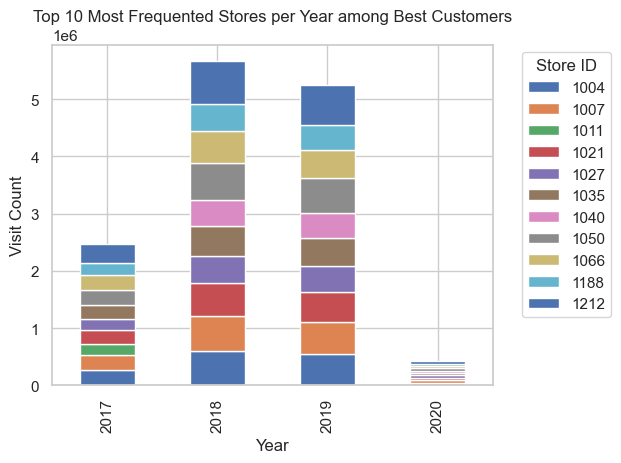

In [ ]:
# First, we may want to pivot the data so that each store is a column, and each row is a year
top_stores_pivoted = top_stores_yearly.pivot(index='year', columns='store_id', values='Visit_Count').fillna(0)

# Now let's plot the data
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Since there could be many stores and we want to compare the top ones for each year, let's use a bar plot
top_stores_pivoted.plot(kind='bar', stacked=True)
plt.title('Top 10 Most Frequented Stores per Year among Best Customers')
plt.xlabel('Year')
plt.ylabel('Visit Count')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
# Filter transactions made by best customers for each year
best_customers_transactions_yearly = df[df['cust_id'].isin(best_customers_yearly)]

# Top 10 Products Description among Best Customers Yearly
top_10_products_desc_yearly = best_customers_transactions_yearly['prod_desc'].value_counts().head(10).reset_index()
top_10_products_desc_yearly.columns = ['Product Description', 'Frequency']

# Top 10 Products Section among Best Customers Yearly
top_10_products_section_yearly = best_customers_transactions_yearly['prod_section'].value_counts().head(10).reset_index()
top_10_products_section_yearly.columns = ['Product Section', 'Frequency']

# Top 10 Products Categories among Best Customers Yearly
top_10_products_category_yearly = best_customers_transactions_yearly['prod_category'].value_counts().head(10).reset_index()
top_10_products_category_yearly.columns = ['Product Category', 'Frequency']

# Top 10 Product Subcategories among Best Customers Yearly
top_10_product_subcategories_yearly = best_customers_transactions_yearly['prod_subcategory'].value_counts().head(10).reset_index()
top_10_product_subcategories_yearly.columns = ['Product Subcategory', 'Frequency']

# Top 10 Most Frequently Visited Stores among Best Customers Yearly
top_10_stores_yearly = best_customers_transactions_yearly['store_id'].value_counts().head(10).reset_index()
top_10_stores_yearly.columns = ['Store ID', 'Visit Count']

print("Top 10 Product Description among Best Customers Yearly:")
print(top_10_products_desc_yearly.to_string(index=False))
print("\nTop 10 Product Section among Best Customers Yearly:")
print(top_10_products_section_yearly.to_string(index=False))
print("Top 10 Product Category among Best Customers Yearly:")
print(top_10_products_category_yearly.to_string(index=False))
print("\nTop 10 Product Subcategory among Best Customers Yearly:")
print(top_10_product_subcategories_yearly.to_string(index=False))
print("\nTop 10 Most Frequently Visited Stores among Best Customers Yearly:")
print(top_10_stores_yearly.to_string(index=False))


: 